# Actividad Autónoma 2 — Unidad 1 (POO) — Tema 2
Pablo Andrés Terán Corrales


Segundo "B"


## 1) Objetivo y requerimientos (resumen)
- Abstracción, Encapsulamiento, Herencia y Polimorfismo
- Patrones: Strategy, Decorator, Singleton
- Sobrecargas: __eq__ y __add__ (ControlDeFlota)
- Reto: Estrategia Emergencia


## 2) Código completo (clases, patrones y sobrecargas)

In [1]:

from __future__ import annotations
from abc import ABC, abstractmethod
from typing import List, Optional, Protocol

class EstrategiaConduccion(Protocol):
    def ajustar_velocidad(self, velocidad_actual: float, velocidad_maxima: float) -> float: ...

class ConduccionEconomica:
    def ajustar_velocidad(self, velocidad_actual: float, velocidad_maxima: float) -> float:
        objetivo = 0.70 * velocidad_maxima
        if velocidad_actual < objetivo:
            return min(objetivo, velocidad_actual + max(1.0, 0.05 * velocidad_maxima))
        return min(velocidad_maxima, velocidad_actual)

class ConduccionDeportiva:
    def ajustar_velocidad(self, velocidad_actual: float, velocidad_maxima: float) -> float:
        if velocidad_actual < velocidad_maxima:
            return min(velocidad_maxima, velocidad_actual + max(5.0, 0.15 * velocidad_maxima))
        return velocidad_maxima

class ConduccionOffRoad:
    def ajustar_velocidad(self, velocidad_actual: float, velocidad_maxima: float) -> float:
        limite = 0.60 * velocidad_maxima
        if velocidad_actual < limite:
            return min(limite, velocidad_actual + max(1.0, 0.07 * velocidad_maxima))
        return max(limite, velocidad_actual - 0.10 * velocidad_maxima)

class ConduccionEmergencia:
    def ajustar_velocidad(self, velocidad_actual: float, velocidad_maxima: float) -> float:
        limite_emergencia = 1.20 * velocidad_maxima
        if velocidad_actual < limite_emergencia:
            return min(limite_emergencia, velocidad_actual + max(8.0, 0.20 * velocidad_maxima))
        return limite_emergencia

class Vehiculo(ABC):
    def __init__(self, identificador: str, modelo: str, velocidad_maxima: float, capacidad_carga: float):
        self._identificador = identificador
        self._modelo = modelo
        self._velocidad_maxima = float(velocidad_maxima)
        self._capacidad_carga = float(capacidad_carga)
        self._velocidad_actual = 0.0
        self._estrategia: EstrategiaConduccion = ConduccionEconomica()

    @property
    def identificador(self) -> str: return self._identificador
    @property
    def modelo(self) -> str: return self._modelo
    @modelo.setter
    def modelo(self, valor: str) -> None:
        if not valor: raise ValueError("El modelo no puede ser vacío.")
        self._modelo = valor
    @property
    def velocidad_maxima(self) -> float: return self._velocidad_maxima
    @velocidad_maxima.setter
    def velocidad_maxima(self, valor: float) -> None:
        if valor <= 0: raise ValueError("La velocidad máxima debe ser positiva.")
        self._velocidad_maxima = float(valor)
    @property
    def capacidad_carga(self) -> float: return self._capacidad_carga
    @capacidad_carga.setter
    def capacidad_carga(self, valor: float) -> None:
        if valor < 0: raise ValueError("La capacidad de carga no puede ser negativa.")
        self._capacidad_carga = float(valor)
    @property
    def velocidad_actual(self) -> float: return self._velocidad_actual
    @property
    def estrategia(self) -> EstrategiaConduccion: return self._estrategia
    def cambiar_estrategia(self, nueva: EstrategiaConduccion) -> None:
        if nueva is None: raise ValueError("La estrategia no puede ser None.")
        self._estrategia = nueva
    @abstractmethod
    def acelerar(self) -> None: ...
    @abstractmethod
    def frenar(self) -> None: ...
    @abstractmethod
    def informar_estado(self) -> str: ...
    def __eq__(self, other: object) -> bool:
        if not isinstance(other, Vehiculo): return NotImplemented
        return (self.modelo == other.modelo) and (self.velocidad_maxima == other.velocidad_maxima)

class Automovil(Vehiculo):
    def acelerar(self) -> None:
        objetivo = self.estrategia.ajustar_velocidad(self.velocidad_actual, self.velocidad_maxima)
        self._velocidad_actual = min(objetivo, self.velocidad_actual + 0.10 * self.velocidad_maxima)
    def frenar(self) -> None:
        self._velocidad_actual = max(0.0, self.velocidad_actual - 0.15 * self.velocidad_maxima)
    def informar_estado(self) -> str:
        return f"[Automóvil] {self.identificador} ({self.modelo}) vel={self.velocidad_actual:.1f}/{self.velocidad_maxima:.1f} carga={self.capacidad_carga:.1f}"

class Camion(Vehiculo):
    def __init__(self, identificador: str, modelo: str, velocidad_maxima: float, capacidad_carga: float):
        super().__init__(identificador, modelo, velocidad_maxima, capacidad_carga)
        self._remolques: int = 0
    def enganchar_remolque(self) -> None:
        self._remolques += 1
        self._capacidad_carga *= 1.10
    def desenganchar_remolque(self) -> None:
        if self._remolques > 0:
            self._remolques -= 1
            self._capacidad_carga *= 0.90
    def acelerar(self) -> None:
        objetivo = self.estrategia.ajustar_velocidad(self.velocidad_actual, self.velocidad_maxima)
        penalizacion = 0.10 * self._remolques * self.velocidad_maxima
        self._velocidad_actual = min(objetivo, self.velocidad_actual + max(0.05 * self.velocidad_maxima - penalizacion, 0))
    def frenar(self) -> None:
        self._velocidad_actual = max(0.0, self.velocidad_actual - 0.10 * self.velocidad_maxima)
    def informar_estado(self) -> str:
        return f"[Camión] {self.identificador} ({self.modelo}) vel={self.velocidad_actual:.1f}/{self.velocidad_maxima:.1f} carga={self.capacidad_carga:.1f} remolques={self._remolques}"

class Motocicleta(Vehiculo):
    def maniobra_evasiva(self) -> None:
        self._velocidad_actual = max(0.0, self.velocidad_actual - 0.05 * self.velocidad_maxima)
    def acelerar(self) -> None:
        objetivo = self.estrategia.ajustar_velocidad(self.velocidad_actual, self.velocidad_maxima)
        self._velocidad_actual = min(objetivo, self.velocidad_actual + 0.20 * self.velocidad_maxima)
    def frenar(self) -> None:
        self._velocidad_actual = max(0.0, self.velocidad_actual - 0.25 * self.velocidad_maxima)
    def informar_estado(self) -> str:
        return f"[Motocicleta] {self.identificador} ({self.modelo}) vel={self.velocidad_actual:.1f}/{self.velocidad_maxima:.1f} carga={self.capacidad_carga:.1f}"

class VehiculoDecorator(Vehiculo, ABC):
    def __init__(self, envuelto: Vehiculo):
        self._envuelto = envuelto
    @property
    def identificador(self) -> str: return self._envuelto.identificador
    @property
    def modelo(self) -> str: return self._envuelto.modelo
    @modelo.setter
    def modelo(self, valor: str) -> None: self._envuelto.modelo = valor
    @property
    def velocidad_maxima(self) -> float: return self._envuelto.velocidad_maxima
    @velocidad_maxima.setter
    def velocidad_maxima(self, valor: float) -> None: self._envuelto.velocidad_maxima = valor
    @property
    def capacidad_carga(self) -> float: return self._envuelto.capacidad_carga
    @capacidad_carga.setter
    def capacidad_carga(self, valor: float) -> None: self._envuelto.capacidad_carga = valor
    @property
    def velocidad_actual(self) -> float: return self._envuelto.velocidad_actual
    @property
    def estrategia(self) -> EstrategiaConduccion: return self._envuelto.estrategia
    def cambiar_estrategia(self, nueva: EstrategiaConduccion) -> None: self._envuelto.cambiar_estrategia(nueva)
    def __eq__(self, other: object) -> bool: return self._envuelto == other

class PilotoAutomaticoDecorator(VehiculoDecorator):
    def acelerar(self) -> None:
        antes = self.velocidad_actual
        self._envuelto.acelerar()
        self._envuelto._velocidad_actual = (antes + self._envuelto.velocidad_actual) / 2.0
    def frenar(self) -> None:
        antes = self.velocidad_actual
        self._envuelto.frenar()
        self._envuelto._velocidad_actual = max(0.0, (antes + self._envuelto.velocidad_actual) / 2.0)
    def informar_estado(self) -> str:
        return self._envuelto.informar_estado() + " + PilotoAutomático"

class AsistenteEstacionamientoDecorator(VehiculoDecorator):
    def acelerar(self) -> None: self._envuelto.acelerar()
    def frenar(self) -> None: self._envuelto.frenar()
    def estacionar_asistido(self) -> str:
        self._envuelto._velocidad_actual = 0.0
        return f"{self.identificador}: Estacionamiento asistido completado."
    def informar_estado(self) -> str:
        return self._envuelto.informar_estado() + " + AsistenteEstacionamiento"

class ControlDeFlota:
    _instancia: Optional["ControlDeFlota"] = None
    def __new__(cls):
        if cls._instancia is None:
            cls._instancia = super().__new__(cls)
            cls._instancia._vehiculos: List[Vehiculo] = []
        return cls._instancia
    @property
    def vehiculos(self) -> List[Vehiculo]: return list(self._vehiculos)
    def registrar(self, vehiculo: Vehiculo) -> None: self._vehiculos.append(vehiculo)
    def __add__(self, vehiculo: Vehiculo) -> "ControlDeFlota":
        self.registrar(vehiculo); return self
    def buscar_por_modelo(self, modelo: str) -> List[Vehiculo]:
        return [v for v in self._vehiculos if v.modelo == modelo]
    def estado_general(self) -> str:
        if not self._vehiculos: return "Flota vacía."
        return "\\n".join(v.informar_estado() for v in self._vehiculos)


## 3) Diagramas UML

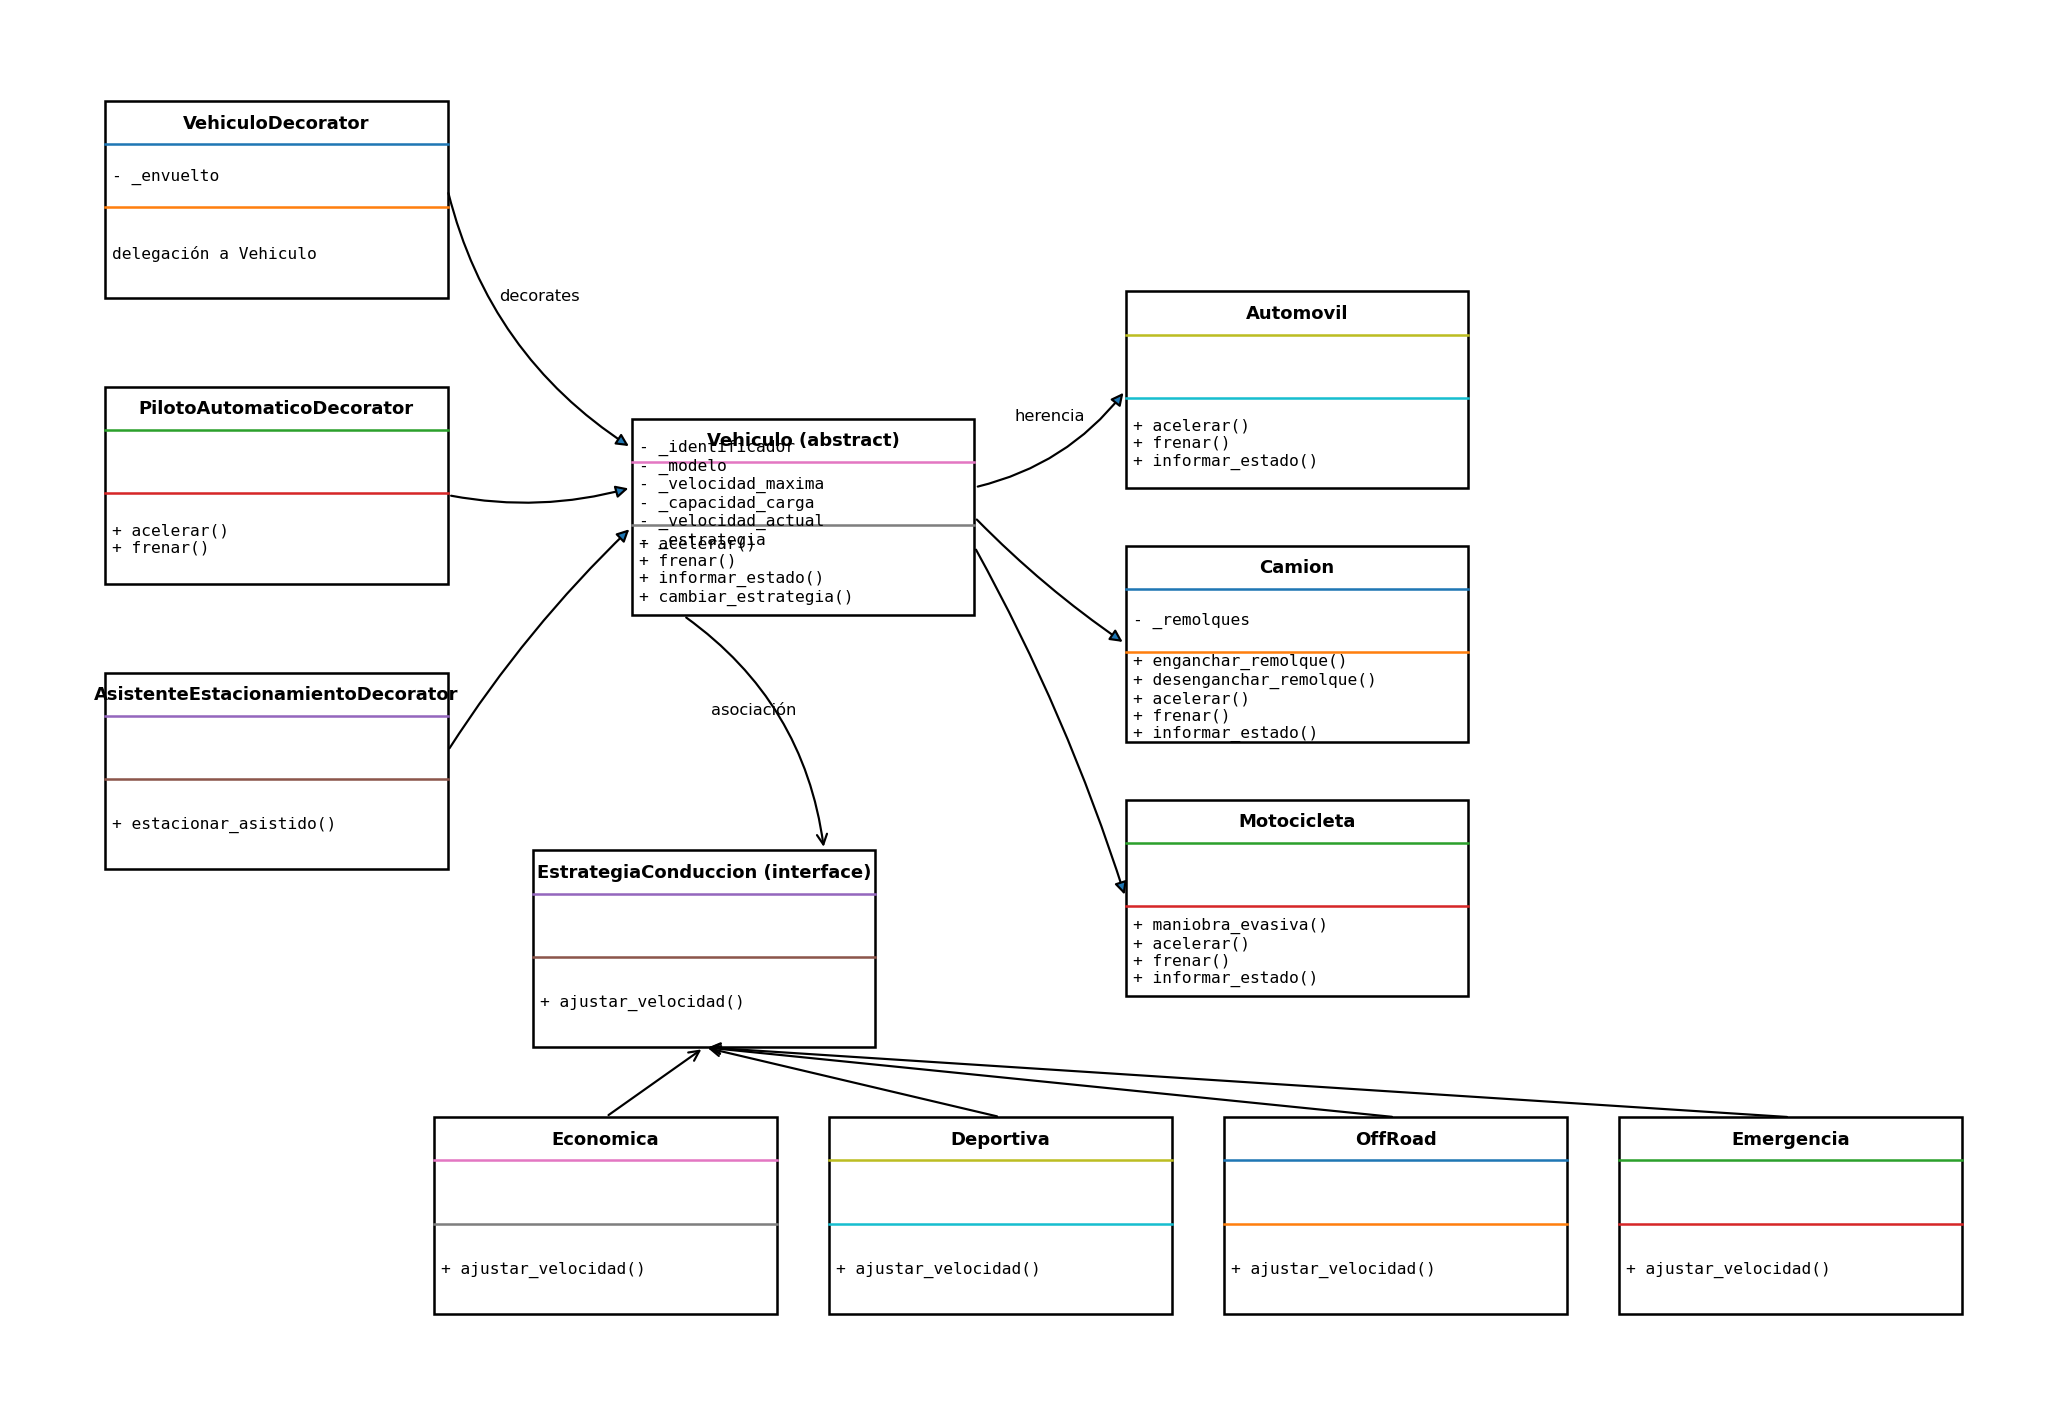

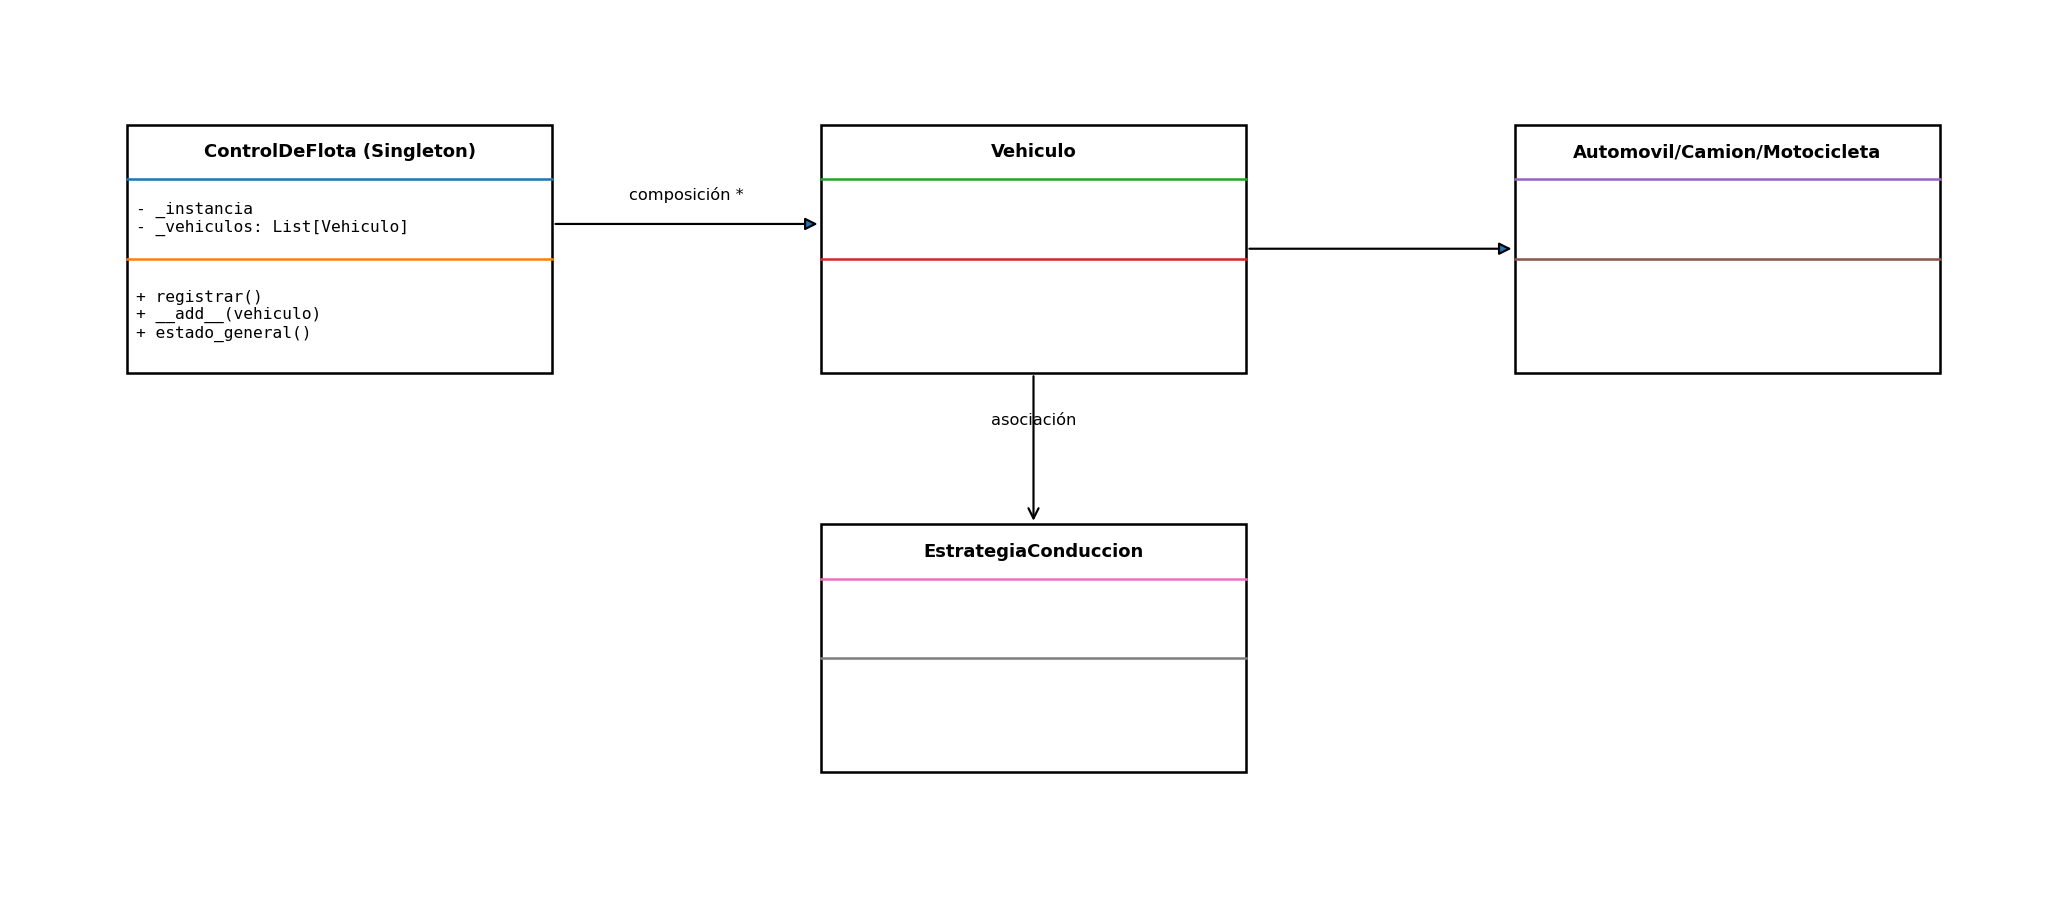

Guardado también como 'uml_clases_legible.png' y 'uml_relaciones_legible.png'.


In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

# ----- Helpers -----
def draw_class(ax, x, y, w, h, title, attrs=None, methods=None,
               fontsize=9, lw=1.4, pad=0.02, zorder=2):
    """Dibuja una caja UML y devuelve su bounding box [(x0,y0),(x1,y1)]."""
    rect = Rectangle((x, y), w, h, fill=False, linewidth=lw, zorder=zorder)
    ax.add_patch(rect)
    # separadores
    ay = y + h*0.78
    my = y + h*0.46
    ax.plot([x, x+w], [ay, ay], lw=lw, zorder=zorder)
    ax.plot([x, x+w], [my, my], lw=lw, zorder=zorder)
    # título
    ax.text(x+w/2, y+h*0.89, title, ha="center", va="center",
            fontsize=fontsize+1, fontweight="bold", zorder=zorder)
    # attrs
    if attrs:
        ax.text(x+w*pad, y+h*0.62, "\n".join(attrs), ha="left", va="center",
                fontsize=fontsize, family="monospace", zorder=zorder)
    # methods
    if methods:
        ax.text(x+w*pad, y+h*0.23, "\n".join(methods), ha="left", va="center",
                fontsize=fontsize, family="monospace", zorder=zorder)
    return (x, y), (x+w, y+h)

def connect(ax, A, B, text=None, curved=0.0, lw=1.2, style="-|>", zorder=1):
    a = FancyArrowPatch(A, B, arrowstyle=style, mutation_scale=14,
                        linewidth=lw, connectionstyle=f"arc3,rad={curved}",
                        zorder=zorder)
    ax.add_patch(a)
    if text:
        mx = (A[0]+B[0])/2; my = (A[1]+B[1])/2
        ax.text(mx, my+0.3, text, fontsize=9, ha="center", zorder=zorder+1)

def set_bounds(ax, boxes, pad=1.0):
    """Ajusta límites para que todo entre con padding."""
    xs = []; ys = []
    for (x0,y0),(x1,y1) in boxes:
        xs += [x0, x1]; ys += [y0, y1]
    xmin, xmax = min(xs)-pad, max(xs)+pad
    ymin, ymax = min(ys)-pad, max(ys)+pad
    ax.set_xlim(xmin, xmax); ax.set_ylim(ymin, ymax)

# ===== Diagrama de CLASES =====
fig, ax = plt.subplots(figsize=(16, 11), dpi=130)
ax.axis("off")

W, H = 5.2, 3.1     # tamaño de caja
SX, SY = 1.2, 1.4   # separaciones horizontales/verticales entre cajas

boxes = []

# Coordenadas base (grilla)
# Fila 1 (decorators)
p_vdec  = (0,   16)
p_pauto = (0,   11.5)
p_aest  = (0,    7.0)

# Fila 2 (vehículo base + subclases a la derecha)
p_veh   = (8,   11.0)
p_auto  = (15.5, 13.0)
p_cam   = (15.5,  9.0)
p_moto  = (15.5,  5.0)

# Fila 3 (estrategias)
p_iface = (6.5,  4.2)
p_econ  = (5.0,  0.0)
p_depo  = (11.0, 0.0)
p_offr  = (17.0, 0.0)
p_emer  = (23.0, 0.0)

# Dibujar cajas
boxes.append(draw_class(ax, *p_vdec,  W, H, "VehiculoDecorator",
                        ["- _envuelto"], ["delegación a Vehiculo"]))
boxes.append(draw_class(ax, *p_pauto, W, H, "PilotoAutomaticoDecorator",
                        methods=["+ acelerar()", "+ frenar()"]))
boxes.append(draw_class(ax, *p_aest,  W, H, "AsistenteEstacionamientoDecorator",
                        methods=["+ estacionar_asistido()"]))

boxes.append(draw_class(ax, *p_veh,   W, H, "Vehiculo (abstract)",
                        ["- _identificador", "- _modelo", "- _velocidad_maxima",
                         "- _capacidad_carga", "- _velocidad_actual", "- _estrategia"],
                        ["+ acelerar()", "+ frenar()", "+ informar_estado()", "+ cambiar_estrategia()"]))
boxes.append(draw_class(ax, *p_auto,  W, H, "Automovil",
                        methods=["+ acelerar()", "+ frenar()", "+ informar_estado()"]))
boxes.append(draw_class(ax, *p_cam,   W, H, "Camion",
                        ["- _remolques"],
                        ["+ enganchar_remolque()", "+ desenganchar_remolque()",
                         "+ acelerar()", "+ frenar()", "+ informar_estado()"]))
boxes.append(draw_class(ax, *p_moto,  W, H, "Motocicleta",
                        methods=["+ maniobra_evasiva()", "+ acelerar()", "+ frenar()", "+ informar_estado()"]))

boxes.append(draw_class(ax, *p_iface, W, H, "EstrategiaConduccion (interface)",
                        methods=["+ ajustar_velocidad()"]))
boxes.append(draw_class(ax, *p_econ,  W, H, "Economica",
                        methods=["+ ajustar_velocidad()"]))
boxes.append(draw_class(ax, *p_depo,  W, H, "Deportiva",
                        methods=["+ ajustar_velocidad()"]))
boxes.append(draw_class(ax, *p_offr,  W, H, "OffRoad",
                        methods=["+ ajustar_velocidad()"]))
boxes.append(draw_class(ax, *p_emer,  W, H, "Emergencia",
                        methods=["+ ajustar_velocidad()"]))

# Conexiones (flechas curvas para evitar cruces)
connect(ax, (p_veh[0]+W, p_veh[1]+H*0.65), (p_auto[0], p_auto[1]+H*0.5), text="herencia", curved=0.18)
connect(ax, (p_veh[0]+W, p_veh[1]+H*0.50), (p_cam[0],  p_cam[1]+H*0.5),  curved=0.05)
connect(ax, (p_veh[0]+W, p_veh[1]+H*0.35), (p_moto[0], p_moto[1]+H*0.5), curved=-0.05)

connect(ax, (p_vdec[0]+W,  p_vdec[1]+H*0.55), (p_veh[0], p_veh[1]+H*0.85), text="decorates", curved=0.2)
connect(ax, (p_pauto[0]+W, p_pauto[1]+H*0.45), (p_veh[0], p_veh[1]+H*0.65), curved=0.12)
connect(ax, (p_aest[0]+W,  p_aest[1]+H*0.60), (p_veh[0], p_veh[1]+H*0.45), curved=-0.06)

connect(ax, (p_veh[0]+W*0.15, p_veh[1]), (p_iface[0]+W*0.85, p_iface[1]+H), text="asociación", curved=-0.22, style="->")

for p in [p_econ, p_depo, p_offr, p_emer]:
    connect(ax, (p[0]+W*0.5, p[1]+H), (p_iface[0]+W*0.5, p_iface[1]), curved=0.0, style="->")

# Ajustar límites y guardar
set_bounds(ax, boxes, pad=1.4)
plt.tight_layout()
plt.savefig("uml_clases_legible.png", dpi=160, bbox_inches="tight")
plt.show()

# ===== Diagrama de RELACIONES (resumen) =====
fig, ax = plt.subplots(figsize=(16, 7), dpi=130)
ax.axis("off")
boxes = []

p_ctrl = (1.0, 6.0)
p_v    = (9.5, 6.0)
p_vh   = (18.0, 6.0)
p_if   = (9.5, 1.0)

boxes.append(draw_class(ax, *p_ctrl, W, H, "ControlDeFlota (Singleton)",
                        ["- _instancia", "- _vehiculos: List[Vehiculo]"],
                        ["+ registrar()", "+ __add__(vehiculo)", "+ estado_general()"]))
boxes.append(draw_class(ax, *p_v,    W, H, "Vehiculo"))
boxes.append(draw_class(ax, *p_vh,   W, H, "Automovil/Camion/Motocicleta"))
boxes.append(draw_class(ax, *p_if,   W, H, "EstrategiaConduccion"))

connect(ax, (p_ctrl[0]+W, p_ctrl[1]+H*0.6), (p_v[0],   p_v[1]+H*0.6), text="composición *", curved=0.0)
connect(ax, (p_v[0]+W*0.5, p_v[1]),         (p_if[0]+W*0.5, p_if[1]+H), text="asociación", curved=0.0, style="->")
connect(ax, (p_v[0]+W,     p_v[1]+H*0.5),   (p_vh[0],  p_vh[1]+H*0.5), curved=0.0)

set_bounds(ax, boxes, pad=1.4)
plt.tight_layout()
plt.savefig("uml_relaciones_legible.png", dpi=160, bbox_inches="tight")
plt.show()

print("Guardado también como 'uml_clases_legible.png' y 'uml_relaciones_legible.png'.")

## 4) Pruebas rápidas

In [5]:

auto = Automovil("A-001", "SedanX", 180, 450)
camion = Camion("C-010", "CargoMax", 120, 8000)
moto = Motocicleta("M-777", "Speedster", 220, 50)

for _ in range(3):
    auto.acelerar(); camion.acelerar(); moto.acelerar()

print(auto.informar_estado())
print(camion.informar_estado())
print(moto.informar_estado())

moto.cambiar_estrategia(ConduccionDeportiva())
auto.cambiar_estrategia(ConduccionOffRoad())
camion.cambiar_estrategia(ConduccionEmergencia())

for _ in range(3):
    auto.acelerar(); camion.acelerar(); moto.acelerar()

print("\nTras cambio de estrategias:")
print(auto.informar_estado())
print(camion.informar_estado())
print(moto.informar_estado())

auto_pa = PilotoAutomaticoDecorator(auto)
moto_ae = AsistenteEstacionamientoDecorator(moto)
auto_pa.acelerar(); auto_pa.frenar()
print("\nDecorator - Piloto Automático:", auto_pa.informar_estado())
print("Decorator - Estacionamiento:", moto_ae.estacionar_asistido())
print("Decorator - Estado:", moto_ae.informar_estado())

control = ControlDeFlota()
control + auto; control + camion; control + moto
print("\nEstado general de la flota:")
print(control.estado_general())

otro_auto = Automovil("A-999", "SedanX", 180, 500)
print("\n¿auto == otro_auto?", auto == otro_auto)
print("¿auto == camion?", auto == camion)


[Automóvil] A-001 (SedanX) vel=27.0/180.0 carga=450.0
[Camión] C-010 (CargoMax) vel=18.0/120.0 carga=8000.0 remolques=0
[Motocicleta] M-777 (Speedster) vel=33.0/220.0 carga=50.0

Tras cambio de estrategias:
[Automóvil] A-001 (SedanX) vel=64.8/180.0 carga=450.0
[Camión] C-010 (CargoMax) vel=36.0/120.0 carga=8000.0 remolques=0
[Motocicleta] M-777 (Speedster) vel=132.0/220.0 carga=50.0

Decorator - Piloto Automático: [Automóvil] A-001 (SedanX) vel=57.6/180.0 carga=450.0 + PilotoAutomático
Decorator - Estacionamiento: M-777: Estacionamiento asistido completado.
Decorator - Estado: [Motocicleta] M-777 (Speedster) vel=0.0/220.0 carga=50.0 + AsistenteEstacionamiento

Estado general de la flota:
[Automóvil] A-001 (SedanX) vel=57.6/180.0 carga=450.0\n[Camión] C-010 (CargoMax) vel=36.0/120.0 carga=8000.0 remolques=0\n[Motocicleta] M-777 (Speedster) vel=0.0/220.0 carga=50.0

¿auto == otro_auto? True
¿auto == camion? False


## 5) Explicación breve

Modelo con POO clásica. Se define Vehiculo como abstracta para fijar la interfaz mínima (acelerar, frenar, informar_estado) y asegurar polimorfismo en Automovil, Camion y Motocicleta. El encapsulamiento mediante @property añade validaciones (p. ej., velocidades positivas) y evita estados inválidos.

Composición sobre herencia para el “cómo conduce”. El patrón Strategy desacopla la lógica de aceleración: ConduccionEconomica, Deportiva, OffRoad y el reto Emergencia (sobrepaso temporal +20%). Así, el comportamiento se cambia en tiempo de ejecución sin crear jerarquías rígidas ni múltiples subclases por modo de manejo.

Extensiones no intrusivas. Con Decorator (PilotoAutomaticoDecorator, AsistenteEstacionamientoDecorator) se agregan capacidades a cualquier vehículo sin modificar su código ni duplicar clases (evita “explosión” de combinaciones: auto+piloto, auto+estacionamiento, etc.).

Estado global controlado. ControlDeFlota usa Singleton para un punto único de verdad de la flota (registro, consulta, estado). Esto simplifica la coordinación y evita inconsistencias por múltiples gestores.

Operadores sobrecargados por legibilidad. __eq__ define igualdad semántica (mismo modelo y velocidad_maxima) útil en búsquedas/comparaciones. __add__ en ControlDeFlota permite un DSL mínimo (control + vehiculo) que hace el uso más expresivo sin ocultar la intención.

Simplicidad y pruebas. La lógica de aceleración usa reglas deterministas y límites claros (p. ej., cap de emergencia), lo que facilita testeo y explicación. El diseño favorece bajo acoplamiento (estrategias/decorators intercambiables) y alta cohesión (cada clase tiene una responsabilidad clara).

Entregable autocontenido. Todo vive en un notebook único, lo que asegura reproducibilidad (sin dependencias externas) y permite generar UML y demostraciones en el mismo entorno.
